In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv("Data_Naive.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[   21 65000]
 [   25 78000]
 [   30 80000]
 [   29 57000]
 [   34 87000]
 [   32 64000]
 [   31 73000]
 [   26 71000]
 [   28 70000]
 [   35 67000]
 [   25 85000]]


In [6]:
print(y)

[1 1 0 0 0 1 0 0 0 1 0]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [8]:
print(x_train)

[[   25 85000]
 [   31 73000]
 [   25 78000]
 [   26 71000]
 [   28 70000]
 [   29 57000]
 [   21 65000]
 [   32 64000]]


In [9]:
print(x_test)

[[   34 87000]
 [   35 67000]
 [   30 80000]]


In [10]:
print(y_train)

[0 0 1 0 0 0 1 1]


In [11]:
print(y_test)

[0 1 0]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
print(x_train)

[[-0.6304951   1.80042619]
 [ 1.14972636  0.32315342]
 [-0.6304951   0.93868374]
 [-0.33379152  0.07694129]
 [ 0.25961563 -0.04616477]
 [ 0.55631921 -1.64654361]
 [-1.81730941 -0.66169509]
 [ 1.44642994 -0.78480116]]


In [14]:
print(x_test)

[[ 2.03983709  2.04663831]
 [ 2.33654067 -0.41548297]
 [ 0.85302278  1.18489587]]


In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


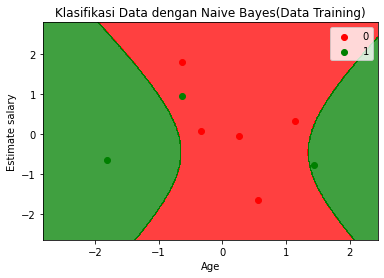

In [18]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes(Data Training)')
plt.xlabel('Age')
plt.ylabel('Estimate salary')
plt.legend()
plt.show()